In [2]:
using DelimitedFiles
using Plots

# ctv

## minimization

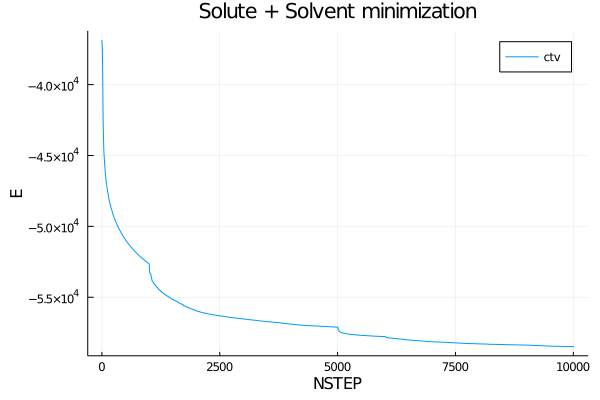

In [3]:
dir_ctv_min="/home/pbarletta/labo/20/cph_obp/run/ctv/mhe/m"
ctv_min_Etot = readdlm("$dir_ctv_min/outputs/Etot_min")[:, 2]
ctv_mmin_Etot = readdlm("$dir_ctv_min/outputs/Etot_mmin")[:, 2]

ntpr = 5
NSTEPS = ntpr * (length(ctv_min_Etot) + length(ctv_mmin_Etot))
x = collect(0:5:NSTEPS-1)

plot(x, [ ctv_min_Etot ; ctv_mmin_Etot],
    label = "ctv", title = "Solute + Solvent minimization",
    yaxis = "E", xaxis = "NSTEP")

## heat

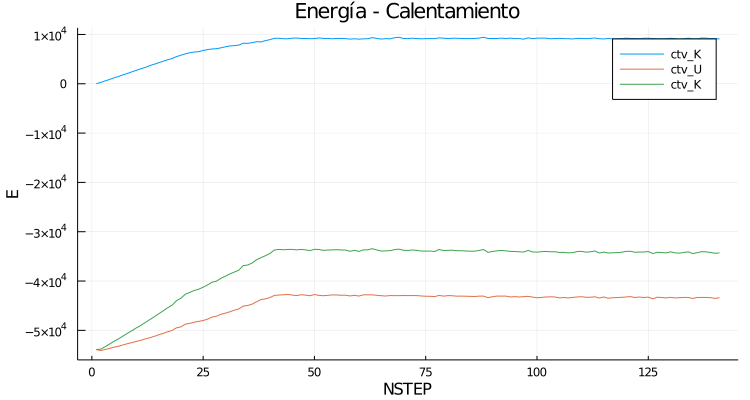

In [4]:
# Energies
dir_ctv_hea="/home/pbarletta/labo/20/cph_obp/run/ctv/mhe/h"
ctv_hea_Ek = readdlm("$dir_ctv_hea/outputs/ektot.dat")[:, 2]
ctv_hea_Ep = readdlm("$dir_ctv_hea/outputs/eptot.dat")[:, 2]
ctv_hea_Etot = readdlm("$dir_ctv_hea/outputs/etot.dat")[:, 2]

plot(ctv_hea_Ek,
    label = "ctv_K", title = "Energía - Calentamiento", size = (750, 400),
    yaxis = "E", xaxis = "NSTEP")
plot!(ctv_hea_Ep, label = "ctv_U")
plot!(ctv_hea_Etot, label = "ctv_K")

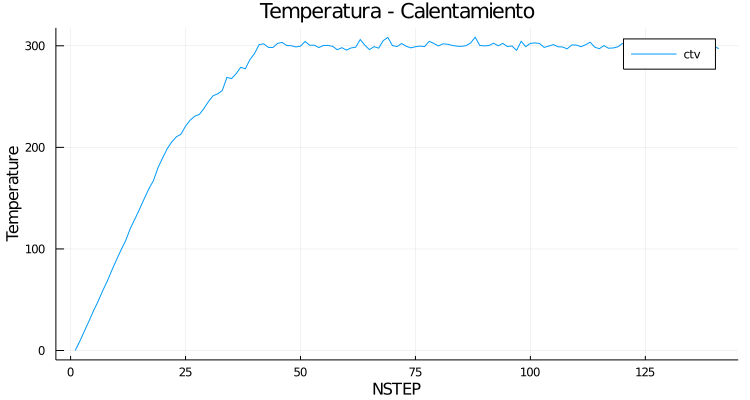

In [5]:
ctv_hea_T = readdlm("$dir_ctv_hea/outputs/temp.dat")[:, 2]

plot(ctv_hea_T,
    label = "ctv", title = "Temperatura - Calentamiento", size = (750, 400),
    yaxis = "Temperature", xaxis = "NSTEP")

## equilibration

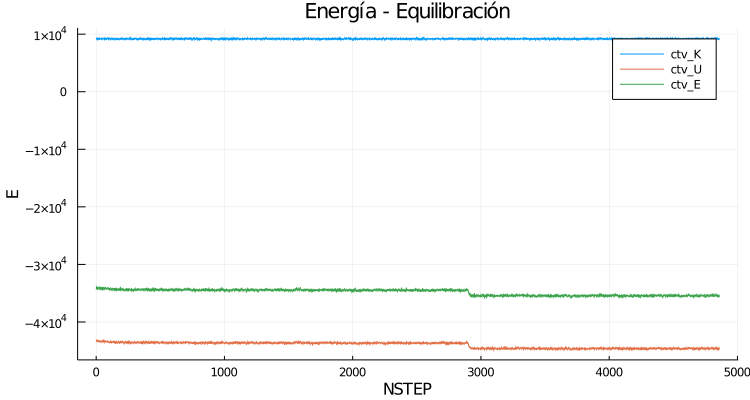

In [6]:
# Energies
dir_ctv_equ="/home/pbarletta/labo/20/cph_obp/run/ctv/mhe/e"
ctv_equ_Ek = readdlm("$dir_ctv_equ/outputs/ektot.dat")[:, 2]
ctv_equ_Ep = readdlm("$dir_ctv_equ/outputs/eptot.dat")[:, 2]
ctv_equ_Etot = readdlm("$dir_ctv_equ/outputs/etot.dat")[:, 2]

plot(ctv_equ_Ek,
    label = "ctv_K", title = "Energía - Equilibración", size = (750, 400),
    yaxis = "E", xaxis = "NSTEP")
plot!(ctv_equ_Ep, label = "ctv_U")
plot!(ctv_equ_Etot, label = "ctv_E")

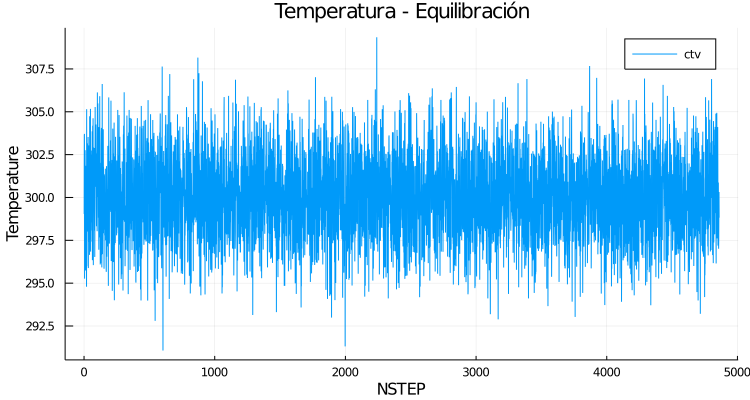

In [7]:
# Temperature
ctv_equ_T = readdlm("$dir_ctv_equ/outputs/temp.dat")[:, 2]

plot(ctv_equ_T,
    label = "ctv", title = "Temperatura - Equilibración", size = (750, 400),
    yaxis = "Temperature", xaxis = "NSTEP")

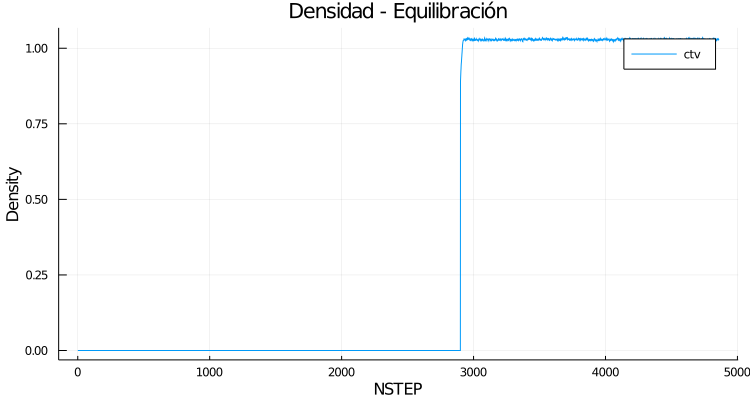

In [8]:
# Density
lb3_equ_dens = readdlm("$dir_ctv_equ/outputs/density.dat")[:, 2]
# Only last part was ran at Pr=cte.
lb3_equ_dens[lb3_equ_dens .== ""] .= 0.0
lb3_equ_dens = convert(Array{Float64, 1}, lb3_equ_dens)

plot(lb3_equ_dens,
    label = "ctv", title = "Densidad - Equilibración", size = (750, 400),
    yaxis = "Density", xaxis = "NSTEP")

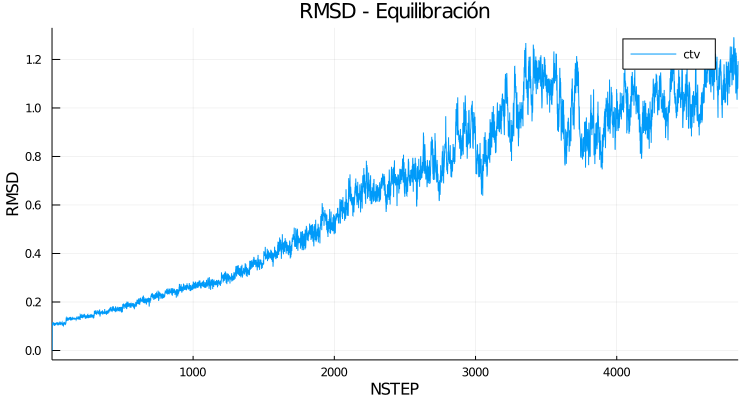

In [11]:
# RMSD ntwx=500
ctv_equ_rmsd = readdlm("$dir_ctv_equ/rmsd_equ_ctv")[2:end, 2]

plot(ctv_equ_rmsd,
    xlims = (1, length(ctv_equ_rmsd)), xticks = 0:1E3:length(ctv_equ_rmsd), yticks = 0:.2:1.5,
    label = "ctv", title = "RMSD - Equilibración", size = (750, 400),
    yaxis = "RMSD", xaxis = "NSTEP")